In [1]:
import yfinance as yf
import pandas as pd

# Tickers we need
tickers = {
    'XLF': 'Bank ETF',
    '^VIX': 'Volatility Index',
    '^TNX': '10Y Treasury Yield'
}

# Download last 10 years of daily data
data = {}
for ticker, name in tickers.items():
    df = yf.download(ticker, period='10y', interval='1d')
    df.reset_index(inplace=True)
    data[name] = df
    print(f"{name} downloaded: {df.shape} rows")

# Example: look at XLF
print(data['Bank ETF'].head())


/var/folders/qs/x29c_wxj0r70mjk316_5bnqr0000gn/T/ipykernel_45767/2333898504.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='10y', interval='1d')
[*********************100%***********************]  1 of 1 completed
/var/folders/qs/x29c_wxj0r70mjk316_5bnqr0000gn/T/ipykernel_45767/2333898504.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='10y', interval='1d')


Bank ETF downloaded: (2515, 6) rows


[*********************100%***********************]  1 of 1 completed
/var/folders/qs/x29c_wxj0r70mjk316_5bnqr0000gn/T/ipykernel_45767/2333898504.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='10y', interval='1d')


Volatility Index downloaded: (2515, 6) rows


[*********************100%***********************]  1 of 1 completed

10Y Treasury Yield downloaded: (2514, 6) rows
Price        Date      Close       High        Low       Open     Volume
Ticker                   XLF        XLF        XLF        XLF        XLF
0      2015-12-11  15.769119  15.984305  15.681701  15.883437   89542078
1      2015-12-14  15.802747  15.910339  15.627906  15.782572   71948873
2      2015-12-15  16.172586  16.260005  15.950675  15.964124   93332943
3      2015-12-16  16.434851  16.488647  16.165867  16.320533  102205375
4      2015-12-17  16.199488  16.495369  16.179314  16.495369   70913355


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.express as px


In [6]:
# ===== Setup: Download & Prepare Data =====
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Tickers we need
tickers = {
    'XLF': 'Bank ETF',
    '^VIX': 'Volatility Index',
    '^TNX': '10Y Treasury Yield'
}

# Download last 10 years of daily data
data = {}
for ticker, name in tickers.items():
    df = yf.download(ticker, period='10y', interval='1d')
    df.reset_index(inplace=True)
    data[name] = df
    print(f"{name} downloaded: {df.shape} rows")

# Rename 'Close' columns for clarity
data['Bank ETF'] = data['Bank ETF'][['Date','Close']].rename(columns={'Close':'XLF_Close'})
data['Volatility Index'] = data['Volatility Index'][['Date','Close']].rename(columns={'Close':'VIX_Close'})
data['10Y Treasury Yield'] = data['10Y Treasury Yield'][['Date','Close']].rename(columns={'Close':'TNX_Close'})

# Merge datasets on Date
merged = pd.merge(data['Bank ETF'], data['Volatility Index'], on='Date', how='inner')
merged = pd.merge(merged, data['10Y Treasury Yield'], on='Date', how='inner')

# Compute daily returns
merged['XLF_Return'] = merged['XLF_Close'].pct_change()
merged['VIX_Return'] = merged['VIX_Close'].pct_change()
merged['TNX_Return'] = merged['TNX_Close'].pct_change()

# Drop first row with NaN returns
merged = merged.dropna().reset_index(drop=True)

# Quick check
merged.head()


/var/folders/qs/x29c_wxj0r70mjk316_5bnqr0000gn/T/ipykernel_61979/1004059320.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='10y', interval='1d')
[*********************100%***********************]  1 of 1 completed
/var/folders/qs/x29c_wxj0r70mjk316_5bnqr0000gn/T/ipykernel_61979/1004059320.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='10y', interval='1d')


Bank ETF downloaded: (2515, 6) rows


[*********************100%***********************]  1 of 1 completed
/var/folders/qs/x29c_wxj0r70mjk316_5bnqr0000gn/T/ipykernel_61979/1004059320.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period='10y', interval='1d')


Volatility Index downloaded: (2515, 6) rows


[*********************100%***********************]  1 of 1 completed

10Y Treasury Yield downloaded: (2514, 6) rows


Price,Date,XLF_Close,VIX_Close,TNX_Close,XLF_Return,VIX_Return,TNX_Return
Ticker,,XLF,^VIX,^TNX,,,
0,2015-12-14,15.802743,22.730000,2.225,0.002132,-0.068061,0.040206
1,2015-12-15,16.172594,20.950001,2.268,0.023404,-0.078311,0.019326
2,2015-12-16,16.434853,17.860001,2.287,0.016216,-0.147494,0.008377
3,2015-12-17,16.199490,18.940001,2.238,-0.014321,0.060470,-0.021425
4,2015-12-18,15.766424,20.700001,2.199,-0.026733,0.092925,-0.017426


In [7]:
# Max drawdown
roll_max = merged['XLF_Close'].cummax()
merged['XLF_Drawdown'] = (merged['XLF_Close'] - roll_max) / roll_max

# Rolling beta vs VIX (30-day)
merged['Beta_XLF_VIX'] = merged['XLF_Return'].rolling(30).cov(merged['VIX_Return']) / merged['VIX_Return'].rolling(30).var()

# Rolling 30-day Sharpe ratio (approx. annualized)
merged['XLF_Sharpe'] = merged['XLF_Return'].rolling(30).mean() / merged['XLF_Return'].rolling(30).std() * (252**0.5)


In [8]:
merged['XLF_Risk'] = pd.cut(
    merged['XLF_Return'],
    bins=[-float('inf'), -0.02, 0.02, float('inf')],
    labels=['High Risk', 'Moderate Risk', 'Low Risk']
)

merged['XLF_Risk'].value_counts()


XLF_Risk
Moderate Risk    2267
High Risk         132
Low Risk          114
Name: count, dtype: int64

In [11]:
# ===== Enhanced Professional Insights =====

latest = merged.iloc[-1]
latest_date = pd.to_datetime(latest['Date']).item()

def executive_insights(row, data=merged):
    insights = []

    # Market volatility analysis
    if row['VIX_Close'].item() > 30:
        insights.append(
            "⚠️ Market volatility is currently elevated, which historically leads to increased downside risk for the banking sector. "
            "Traders may consider hedging strategies or reducing exposure during these periods."
        )
    elif row['VIX_Close'].item() > 20:
        insights.append(
            "⚖️ Market volatility is moderate. While some risk exists, the sector remains relatively stable, and selective opportunities may arise."
        )
    else:
        insights.append(
            "✅ Market volatility is low, indicating a stable environment for banking equities. This supports steady trading and potential accumulation by institutional investors."
        )

    # Interest rate analysis
    if row['TNX_Close'].item() > 4:
        insights.append(
            "📈 Rising 10Y Treasury yields may increase funding costs for banks, potentially compressing net interest margins. "
            "Investment bankers should monitor loan spreads and balance sheet sensitivity to interest rate changes."
        )
    elif row['TNX_Close'].item() < 2:
        insights.append(
            "💰 Low interest rates continue to support bank lending profitability, providing opportunities for margin expansion in loan portfolios."
        )
    else:
        insights.append(
            "🔹 Interest rates are in a neutral range, offering neither significant headwinds nor tailwinds to banking profitability."
        )

    # XLF performance interpretation
    if row['XLF_Return'].item() < -0.02:
        insights.append(
            f"🔻 XLF declined significantly today ({row['XLF_Return'].item():.2%}), which may reflect short-term investor caution. "
            "Analysts should review sector-specific news and recent earnings reports to understand drivers."
        )
    elif row['XLF_Return'].item() > 0.02:
        insights.append(
            f"📈 XLF gained today ({row['XLF_Return'].item():.2%}), suggesting positive market sentiment for banks. "
            "This could indicate momentum for continued trading gains in the near term."
        )
    else:
        insights.append(
            f"↔️ XLF shows limited movement today ({row['XLF_Return'].item():.2%}), reflecting a balanced trading session without major catalysts."
        )

    # Correlation insights
    corr_vix = data['XLF_Return'].corr(data['VIX_Return'])
    corr_tnx = data['XLF_Return'].corr(data['TNX_Return'])
    insights.append(
        f"📊 Over the past year, XLF has shown a strong negative correlation with market volatility (VIX: {corr_vix:.2f}), "
        f"and a moderate positive correlation with 10Y Treasury yields ({corr_tnx:.2f}). This aligns with typical sector behavior under varying macro conditions."
    )

    # Suggested actions / recommendations
    insights.append(
        "💡 Recommendation: Investors should monitor volatility spikes and interest rate movements closely, "
        "as these factors historically have the greatest impact on banking ETF performance. "
        "Maintaining a diversified risk approach is advised."
    )

    # Join all paragraphs with double line breaks
    return "\n\n".join(insights)

# Print enhanced executive-style insights
summary = f"""
===== BANKING SECTOR EXECUTIVE INSIGHTS =====
Date: {latest_date.strftime('%Y-%m-%d')}

XLF Close: {latest['XLF_Close'].item():.2f} ({latest['XLF_Return'].item():.2%})
VIX Close: {latest['VIX_Close'].item():.2f} ({latest['VIX_Return'].item():.2%})
10Y Treasury Yield: {latest['TNX_Close'].item():.2f}%

Insights:
{executive_insights(latest)}
=====================================
"""
print(summary)



===== BANKING SECTOR EXECUTIVE INSIGHTS =====
Date: 2025-12-11

XLF Close: 54.58 (1.28%)
VIX Close: 15.92 (0.95%)
10Y Treasury Yield: 4.12%

Insights:
✅ Market volatility is low, indicating a stable environment for banking equities. This supports steady trading and potential accumulation by institutional investors.

📈 Rising 10Y Treasury yields may increase funding costs for banks, potentially compressing net interest margins. Investment bankers should monitor loan spreads and balance sheet sensitivity to interest rate changes.

↔️ XLF shows limited movement today (1.28%), reflecting a balanced trading session without major catalysts.

📊 Over the past year, XLF has shown a strong negative correlation with market volatility (VIX: -0.60), and a moderate positive correlation with 10Y Treasury yields (0.40). This aligns with typical sector behavior under varying macro conditions.

💡 Recommendation: Investors should monitor volatility spikes and interest rate movements closely, as these fa

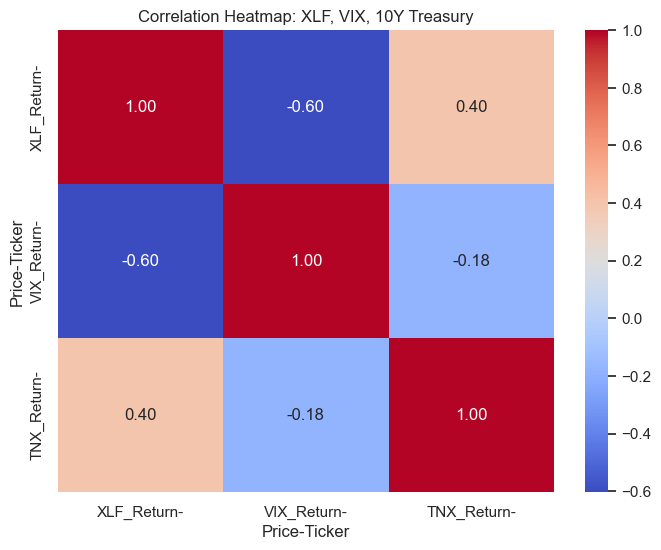

In [13]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(merged[['XLF_Return','VIX_Return','TNX_Return']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: XLF, VIX, 10Y Treasury")
plt.show()


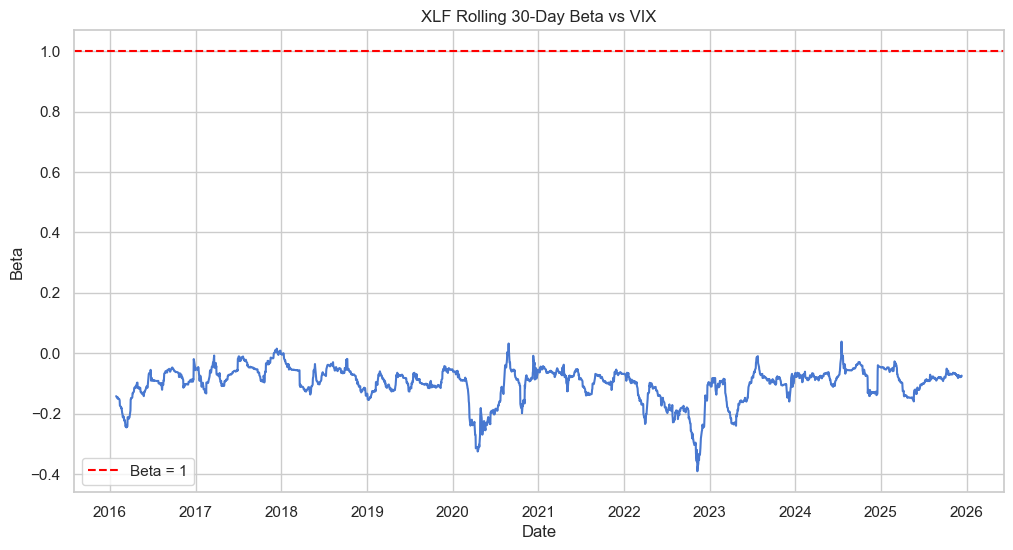

In [14]:
plt.figure(figsize=(12,6))
plt.plot(merged['Date'], merged['Beta_XLF_VIX'])
plt.title("XLF Rolling 30-Day Beta vs VIX")
plt.ylabel("Beta")
plt.xlabel("Date")
plt.axhline(1, color='red', linestyle='--', label="Beta = 1")
plt.legend()
plt.show()


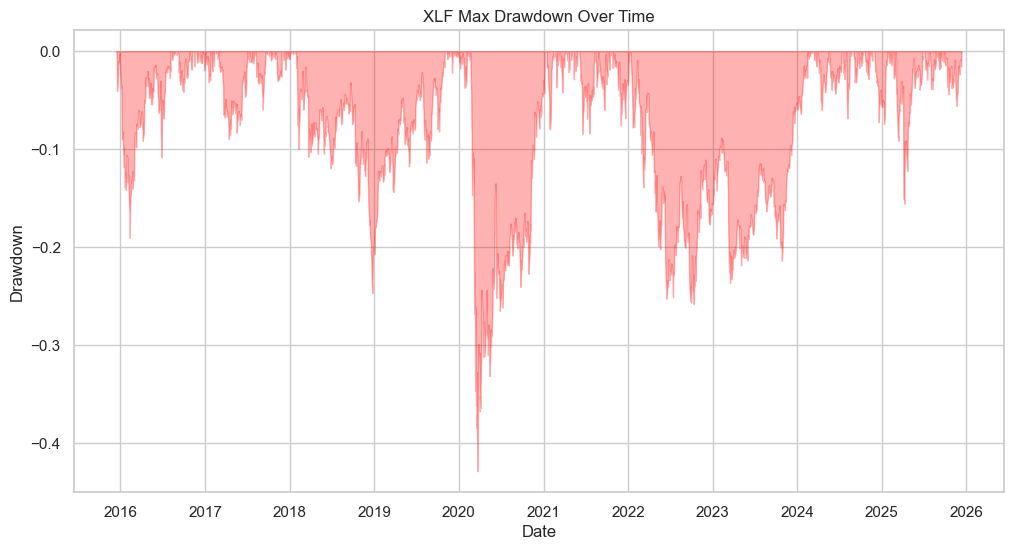

In [15]:
plt.figure(figsize=(12,6))
plt.fill_between(merged['Date'], merged['XLF_Drawdown'], color='red', alpha=0.3)
plt.title("XLF Max Drawdown Over Time")
plt.ylabel("Drawdown")
plt.xlabel("Date")
plt.show()


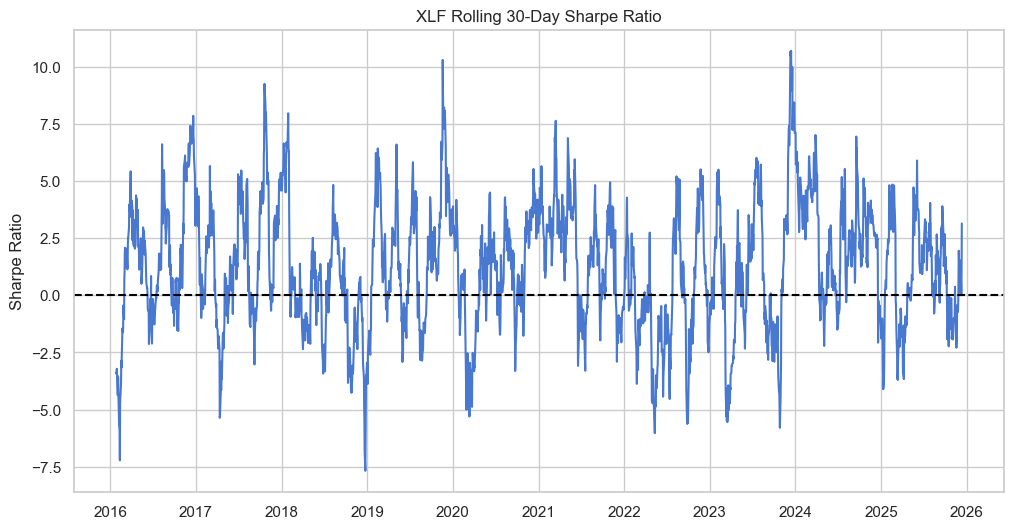

In [16]:
plt.figure(figsize=(12,6))
plt.plot(merged['Date'], merged['XLF_Sharpe'])
plt.title("XLF Rolling 30-Day Sharpe Ratio")
plt.ylabel("Sharpe Ratio")
plt.axhline(0, color='black', linestyle='--')
plt.show()


/opt/miniconda3/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/miniconda3/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/opt/miniconda3/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


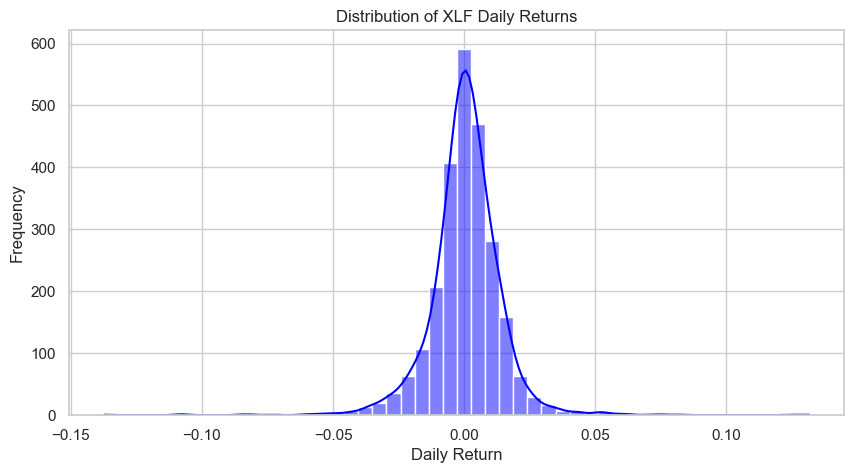

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(merged['XLF_Return'], bins=50, kde=True, color='blue')
plt.title("Distribution of XLF Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (12,6)

# ================= 1️⃣ Correlation Heatmap =================
plt.figure(figsize=(8,6))
sns.heatmap(merged[['XLF_Return','VIX_Return','TNX_Return']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: XLF, VIX, 10Y Treasury")
plt.show()

# ================= 2️⃣ Rolling Beta vs VIX =================
plt.figure(figsize=(12,6))
plt.plot(merged['Date'], merged['Beta_XLF_VIX'], label="Rolling Beta (30d)")
plt.axhline(1, color='red', linestyle='--', label="Beta = 1")
plt.title("XLF Rolling 30-Day Beta vs VIX")
plt.ylabel("Beta")
plt.xlabel("Date")
plt.legend()
plt.show()

# ================= 3️⃣ Max Drawdown =================
plt.figure(figsize=(12,6))
plt.fill_between(merged['Date'], merged['XLF_Drawdown'], color='red', alpha=0.3)
plt.title("XLF Max Drawdown Over Time")
plt.ylabel("Drawdown")
plt.xlabel("Date")
plt.show()

# ================= 4️⃣ Rolling Sharpe Ratio =================
plt.figure(figsize=(12,6))
plt.plot(merged['Date'], merged['XLF_Sharpe'], color='green')
plt.title("XLF Rolling 30-Day Sharpe Ratio")
plt.axhline(0, color='black', linestyle='--')
plt.ylabel("Sharpe Ratio")
plt.xlabel("Date")
plt.show()

# ================= 5️⃣ Distribution of XLF Returns =================
plt.figure(figsize=(10,5))
sns.histplot(merged['XLF_Return'], bins=50, kde=True, color='blue')
plt.title("Distribution of XLF Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# ================= 6️⃣ Risk Classification Pie Chart =================
risk_counts = merged['XLF_Risk'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', colors=['red','orange','green'])
plt.title("XLF Risk Classification")
plt.show()

# ================= 7️⃣ Interactive Plotly Chart =================
# Flatten MultiIndex if necessary
merged.columns = [col[0] if isinstance(col, tuple) else col for col in merged.columns]

fig = px.line(
    merged,
    x='Date',
    y=['XLF_Close','VIX_Close','TNX_Close'],
    labels={'value':'Price', 'variable':'Instrument'},
    title="XLF, VIX, and 10Y Treasury Over Time"
)
fig.show()


NameError: name 'merged' is not defined

<Figure size 800x600 with 0 Axes>